In [2]:
import vice
import arya
import matplotlib.pyplot as plt
import pandas as pd
from surp import VICE_Model
import numpy as np

In [13]:
walks = pd.read_csv("../out/C11_f0.2_gaussian_dt0.05_gaussian_walks.dat")

In [5]:
walks.loc[144].R

t
0.00     14.450000
0.05     14.219067
0.10     14.123412
0.15     14.050013
0.20     13.988134
           ...    
12.95    10.733488
13.00    10.726320
13.05    10.719166
13.10    10.712025
13.15    10.704899
Name: R, Length: 264, dtype: float64

In [6]:
idx = pd.IndexSlice

In [7]:
df_end = walks[walks.t == 13.15]

AttributeError: 'DataFrame' object has no attribute 't'

In [15]:
Ns = np.unique(walks.N)

In [19]:
N = df_end.N[df_end.zone == 70]

In [20]:
t_birth = np.empty(len(Ns))
dR = np.zeros(len(Ns))
for n in Ns:
    print(n, end="\r")
    t_birth[n] = walks.loc[n].index[0]
    dR[n] = walks.loc[n].R[13.15] - walks.loc[n].R[t_birth[n]]

ValueError: could not convert string to float: 'N'

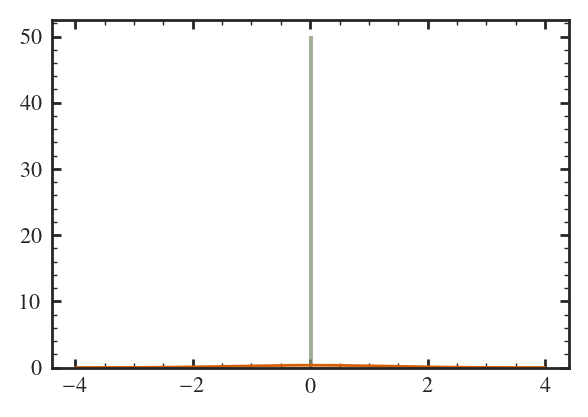

In [21]:
for t in np.arange(0.0, 13.0):
    filt = t_birth > t - 0.5
    filt &= t_birth < t + 0.5
    plt.hist(dR[filt]/np.sqrt(13.2 - t), 50, histtype="step", density=True, alpha=0.1)
    
x = np.linspace(-4, 4, 1000)
σ = 1.27
y = 1/np.sqrt(2*np.pi * σ) * np.exp(-x**2 / (2*σ**2))
plt.plot(x, y)

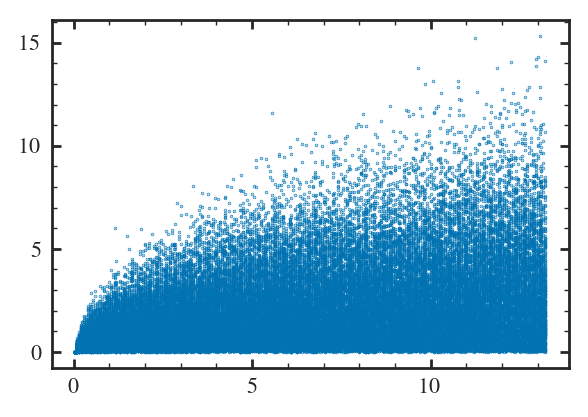

In [85]:
plt.scatter(13.2 - t_birth, np.abs(dR), s=0.05)

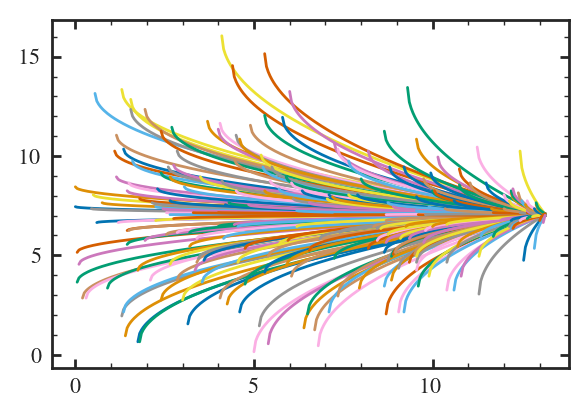

In [22]:
for N in np.unique(df.N):
    dfa = df[df.N == N]
    plt.plot(dfa.t, dfa.R)

In [33]:
gaus = vice_model("../out/C11_f0.2_gaussian_dt0.05.json")
rw = vice_model("../out/C11_f0.2.json")

In [39]:
s = gaus.stars
s1 = rw.stars

(array([ 48., 132., 122., 128., 164., 201., 247., 278., 233., 374., 352.,
        353., 554., 441., 367., 421., 433., 373., 472., 485., 479., 463.,
        510., 427., 539., 602., 448., 375., 338., 295., 227., 212., 200.,
        143., 114.,  65.,  91.,  64.,  37.,  51.,  22.,  31.,  16.,  19.,
         16.,  11.,  12.,   3.,   6.,   6.]),
 array([ 0.05 ,  0.358,  0.666,  0.974,  1.282,  1.59 ,  1.898,  2.206,
         2.514,  2.822,  3.13 ,  3.438,  3.746,  4.054,  4.362,  4.67 ,
         4.978,  5.286,  5.594,  5.902,  6.21 ,  6.518,  6.826,  7.134,
         7.442,  7.75 ,  8.058,  8.366,  8.674,  8.982,  9.29 ,  9.598,
         9.906, 10.214, 10.522, 10.83 , 11.138, 11.446, 11.754, 12.062,
        12.37 , 12.678, 12.986, 13.294, 13.602, 13.91 , 14.218, 14.526,
        14.834, 15.142, 15.45 ]),
 [<matplotlib.patches.Polygon at 0x2b099e20dc10>])

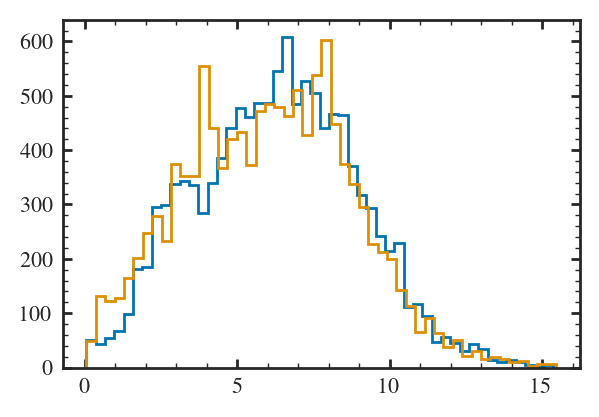

In [41]:
plt.hist(s.r_origin, 50, histtype="step")
plt.hist(s1.r_origin, 50, histtype="step")

In [31]:
s = gaus.stars_unsampled
s_sol = s[s.zone_final == 70]

,formation_time,zone_origin,zone_final,mass,z(fe),z(o),z(mg),z(n),z(c),abs_z,...,[n/fe],[n/o],[n/mg],[c/fe],[c/o],[c/mg],[c/n],z,[m/h],age
0,0.00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,-inf,13.15
1,0.00,1.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,-inf,13.15
2,0.00,2.0,14.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,-inf,13.15
3,0.00,3.0,16.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,-inf,13.15
4,0.00,4.0,44.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,-inf,13.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52795,13.15,195.0,195.0,0.0,2.660091e+13,2.055297e+14,1.879458e+13,1.648650e+13,6.359519e+13,0.0,...,-0.088081,-0.247675,-0.247215,-0.014951,-0.174546,-0.174086,0.073129,3.357797e+14,16.379926,0.00
52796,13.15,196.0,196.0,0.0,2.445980e+13,1.897641e+14,1.735290e+13,1.525669e+13,5.867882e+13,0.0,...,-0.085305,-0.246683,-0.246223,-0.013451,-0.174828,-0.174368,0.071855,3.099176e+14,16.345118,0.00
52797,13.15,197.0,197.0,0.0,1.911946e+13,1.505500e+14,1.376698e+13,1.190524e+13,4.603160e+13,0.0,...,-0.086050,-0.253872,-0.253411,-0.011899,-0.179720,-0.179260,0.074152,2.448537e+14,16.242779,0.00
52798,13.15,198.0,198.0,0.0,7.382370e+12,6.166563e+13,5.638989e+12,4.583954e+12,1.792471e+13,0.0,...,-0.087268,-0.280732,-0.280272,-0.008223,-0.201687,-0.201226,0.079046,9.859714e+13,15.847736,0.00
